WEEK 8

Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour​
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.
Submit the .ipynb file containing the analysis and the generated pictures.​

The csv file includes data from 8th Oct 2024 6:30PM to 18th Oct 2024 6:30PM

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [37]:
df = pd.read_csv("RollingSystemDemand-2024-10-08T18_30_00.000Z-2024-10-18T18_30_00.000Z.csv")#read the file
df.head()

,RecordType,StartTime,Demand
0,VD,2024-10-08T18:30:00Z,35784
1,VD,2024-10-08T18:35:00Z,35488
2,VD,2024-10-08T18:40:00Z,35244
3,VD,2024-10-08T18:45:00Z,35176
4,VD,2024-10-08T18:50:00Z,35022


In [39]:
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['Hour'] = df['StartTime'].dt.hour#create a new column hour

In [41]:
df.head()

,RecordType,StartTime,Demand,Hour
0,VD,2024-10-08 18:30:00+00:00,35784,18
1,VD,2024-10-08 18:35:00+00:00,35488,18
2,VD,2024-10-08 18:40:00+00:00,35244,18
3,VD,2024-10-08 18:45:00+00:00,35176,18
4,VD,2024-10-08 18:50:00+00:00,35022,18


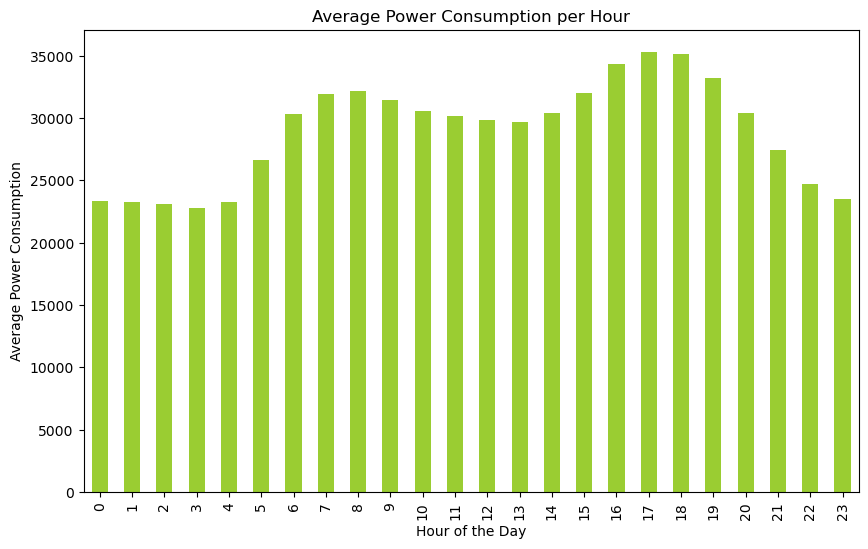

In [43]:
# Average consumption per hour across all days
avgConsumption = df.groupby('Hour')['Demand'].mean()

plt.figure(figsize=(10, 6))
avgConsumption.plot(kind='bar', color='yellowgreen')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumption')
plt.title('Average Power Consumption per Hour')
plt.show()

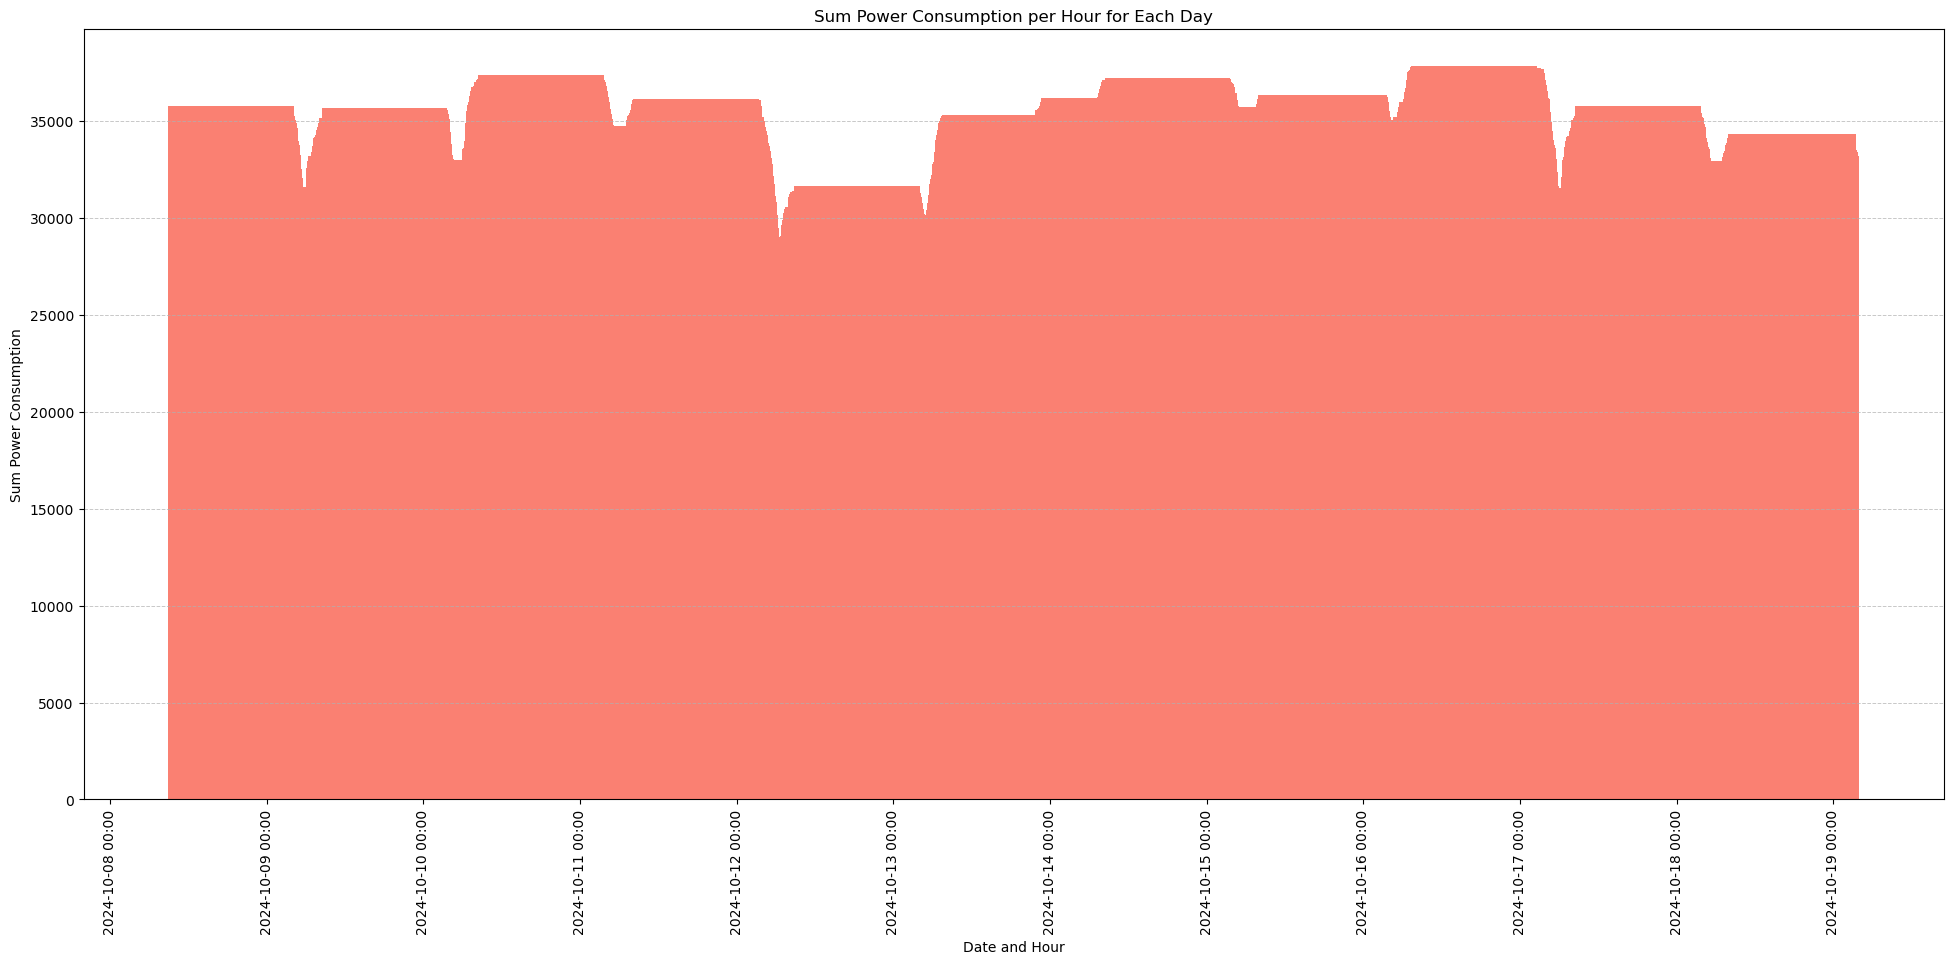

In [45]:
sumConsumption = df.groupby(['StartTime', 'Hour'])['Demand'].sum().reset_index()
plt.figure(figsize=(24, 10))
plt.bar(sumConsumption['StartTime'], sum_consumption['Demand'], color='salmon')
plt.xlabel('Date and Hour')
plt.ylabel('Sum Power Consumption')
plt.title('Sum Power Consumption per Hour for Each Day')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))#this code sets the major ticks on the x-axis to be located at each day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))#this sets the format for the labels on those major ticks

plt.show()

The graph isn't really depicting much, making a few changes-

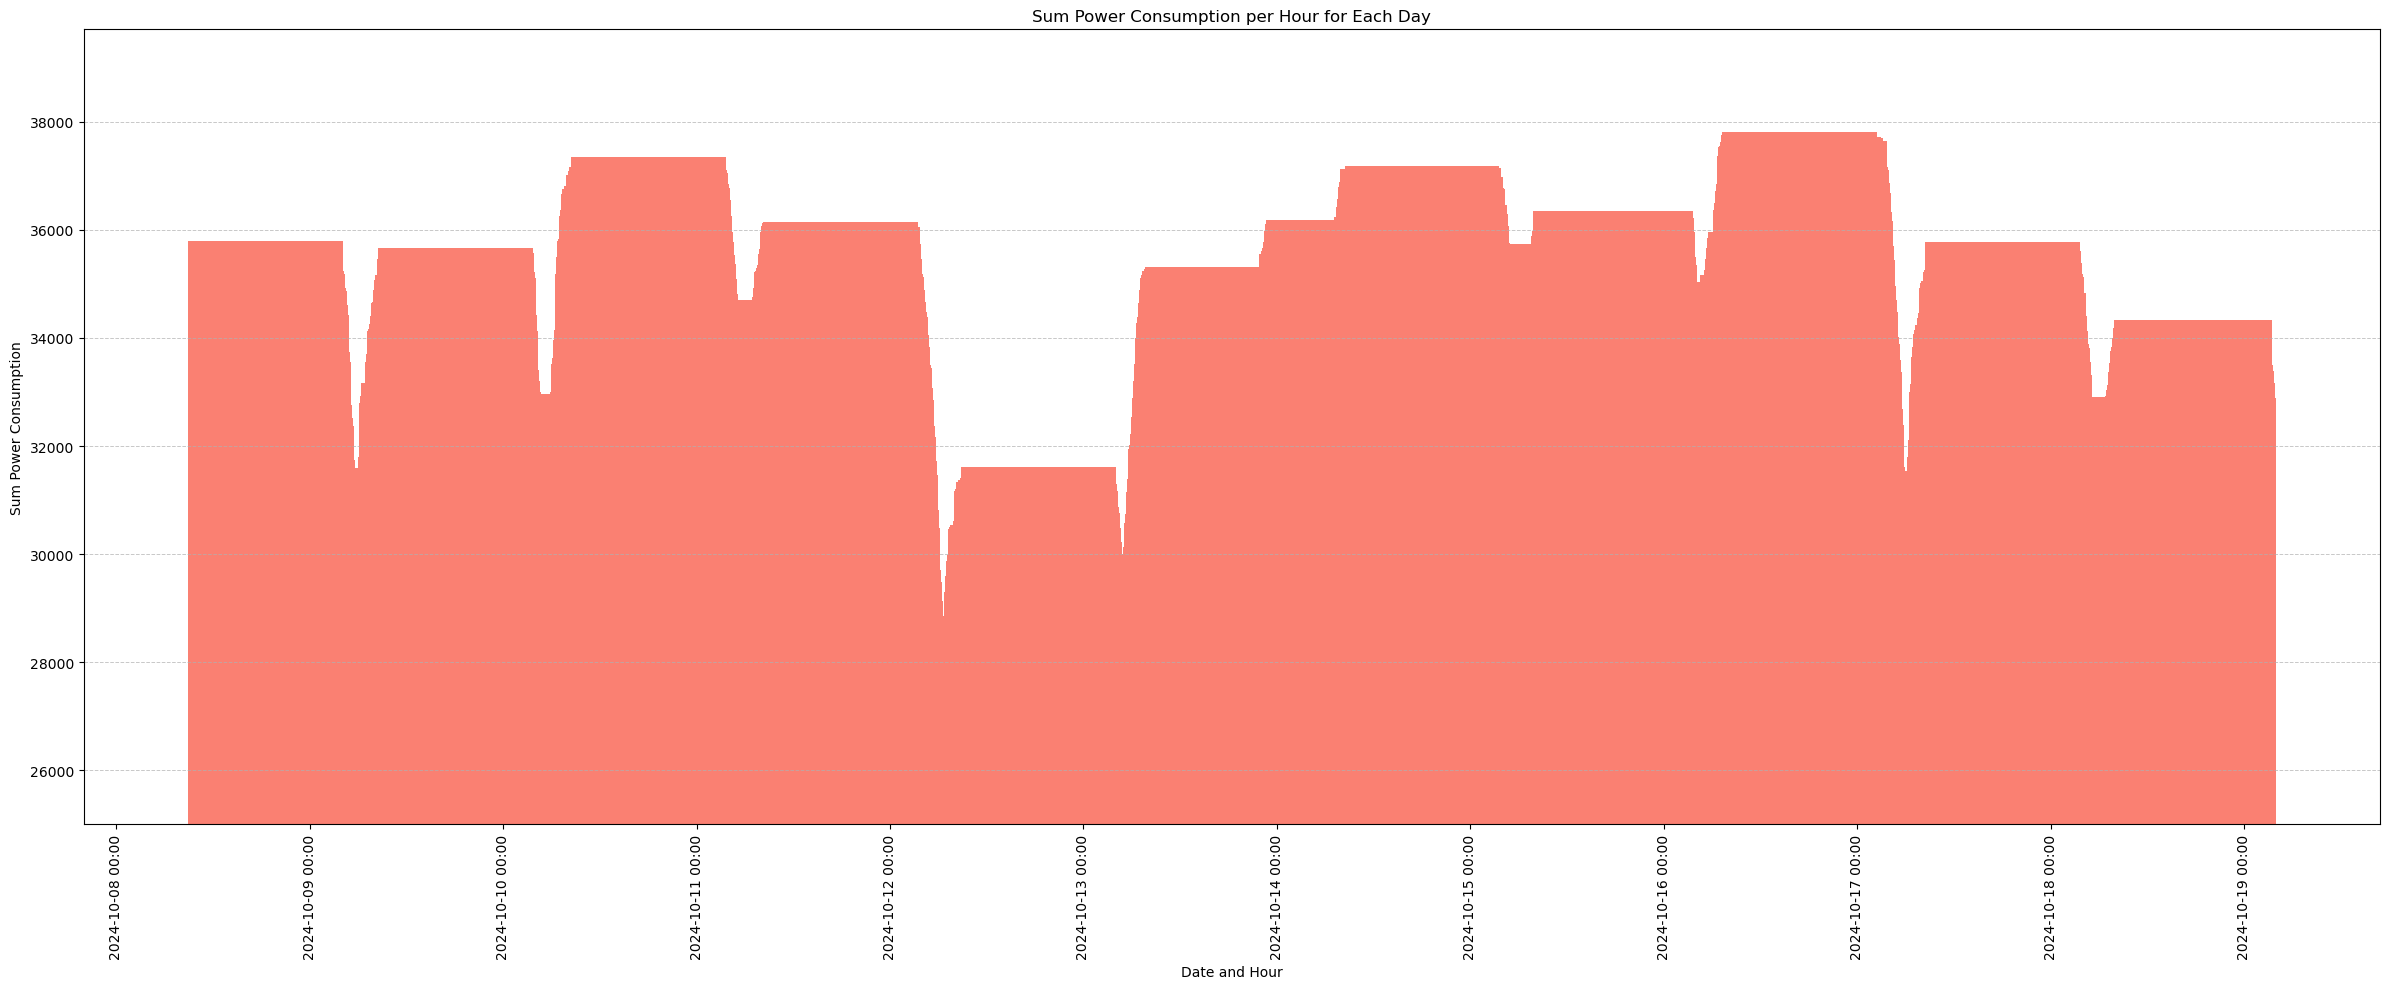

In [47]:
plt.figure(figsize=(24, 10))
plt.bar(sumConsumption['StartTime'], sum_consumption['Demand'], color='salmon')
plt.xlabel('Date and Hour')
plt.ylabel('Sum Power Consumption')
plt.title('Sum Power Consumption per Hour for Each Day')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Set x-axis to include all days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.tight_layout() 
plt.ylim(25000, plt.ylim()[1])

plt.show()